In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.8.0+cu128
True


In [2]:
import numpy as np
import os

data_dir = "/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset"
file_0 = os.path.join(data_dir + "/MWEEG_Subject_4.npz")


In [3]:
sub_0 = np.load(file_0)
print(sub_0.keys())


KeysView(NpzFile '/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset/MWEEG_Subject_4.npz' with keys: EEG, TriggerValues, SampleTime, TriggerTime)


In [4]:
for i in sub_0.files:
    print(i, sub_0[i].shape)

EEG (16, 1019626)
TriggerValues (13,)
SampleTime (1019626,)
TriggerTime (1019626,)


In [5]:
eeg = sub_0['EEG']

eeg = eeg * 1e6

eeg = eeg - eeg.mean(axis=1, keepdims=True)

triggervalues = sub_0['TriggerValues']
print(eeg.shape)
print(triggervalues.shape)

(16, 1019626)
(13,)


In [6]:
fs = 1024
n_channels = eeg.shape[0]
ch_names = [f"Ch{i+1}" for i in range(n_channels)]
ch_types = ["eeg"] * n_channels

In [7]:
import mne

info = mne.create_info([f"Ch{i+1}" for i in range(eeg.shape[0])], sfreq=fs, ch_types=["eeg"]*eeg.shape[0])
raw = mne.io.RawArray(eeg, info)

Creating RawArray with float64 data, n_channels=16, n_times=1019626
    Range : 0 ... 1019625 =      0.000 ...   995.728 secs
Ready.


Using matplotlib as 2D backend.


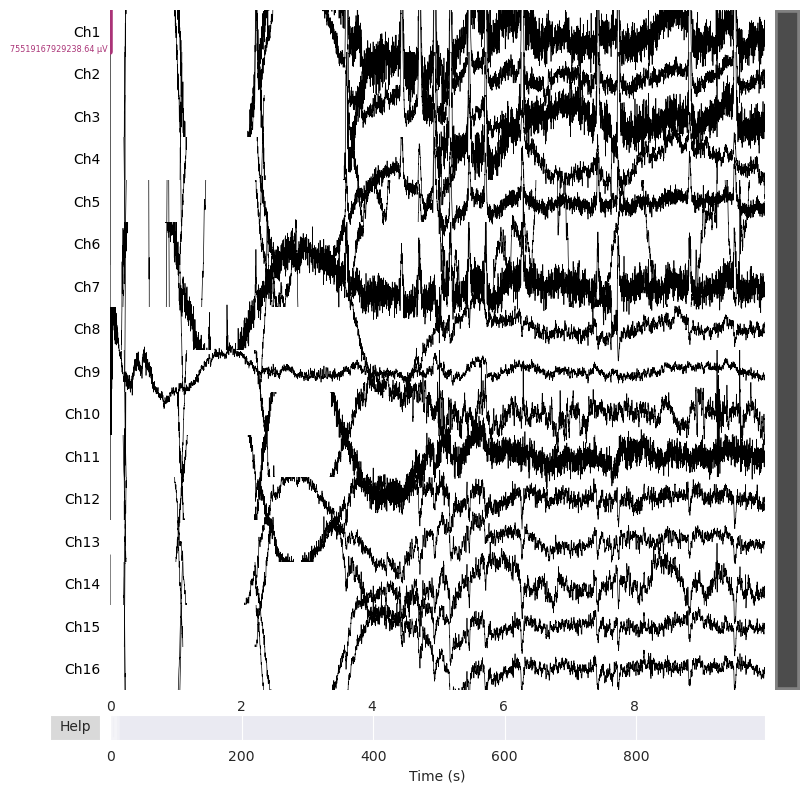

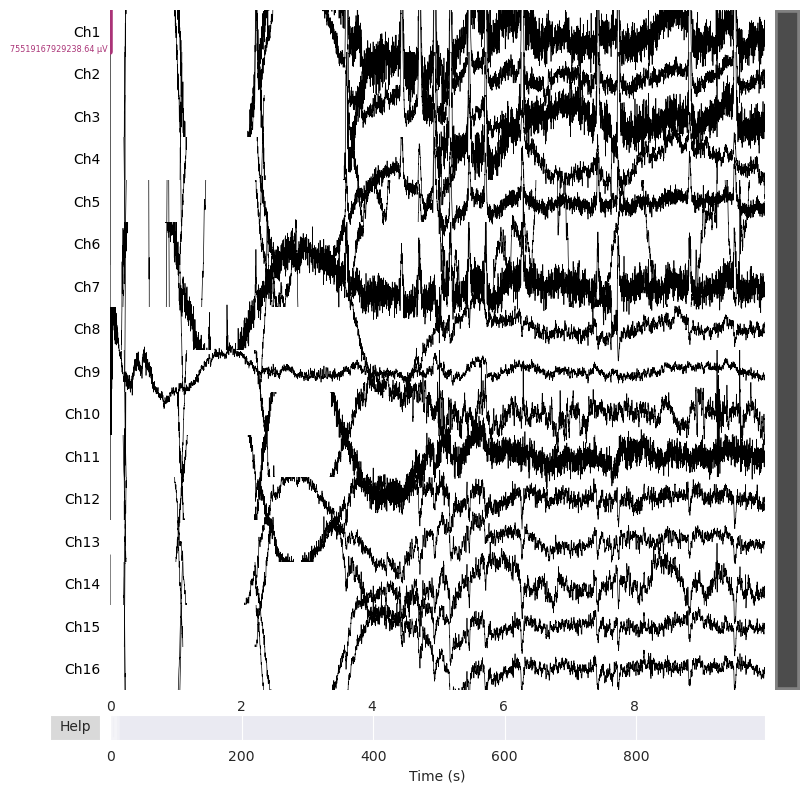

In [8]:
raw.plot(title="EEG Signals", scalings='auto')

#### Filtered between desirable range (1-40 Hz)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3381 samples (3.302 s)



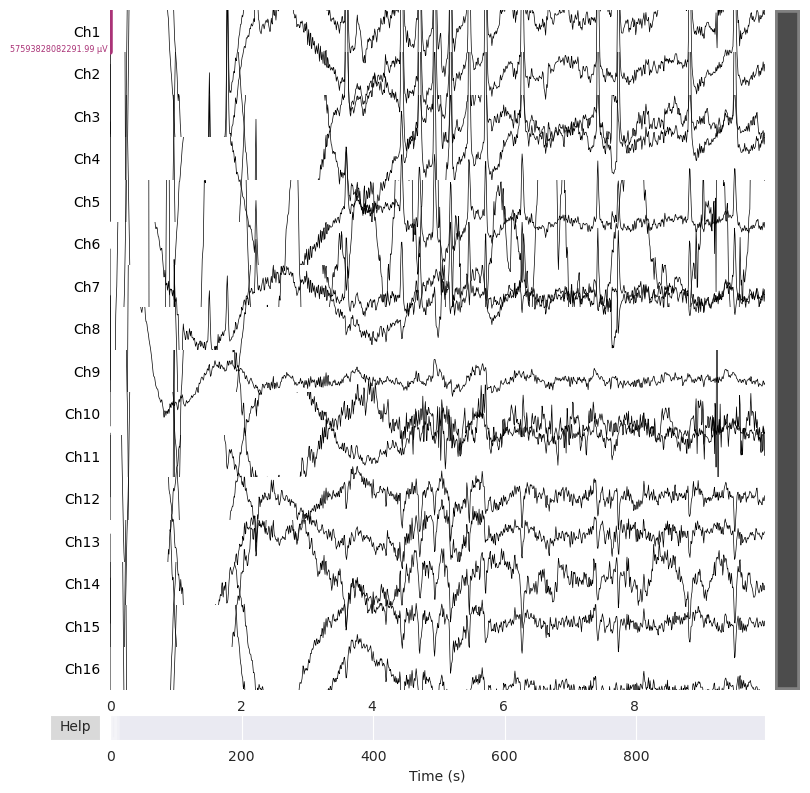

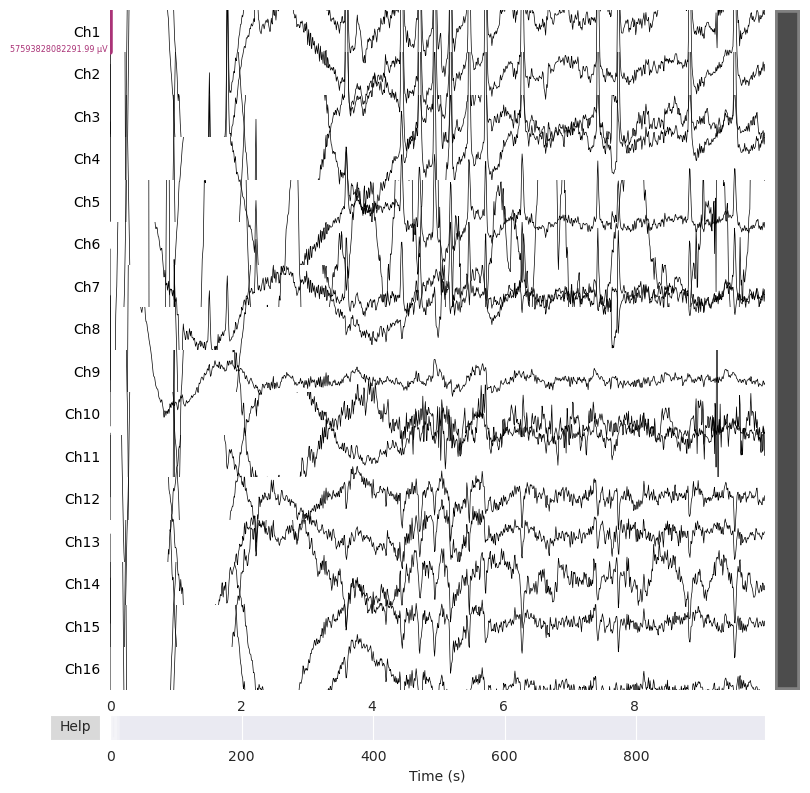

In [9]:
raw.filter(1., 40.)  # keep only 1–40 Hz EEG band
raw.plot(title="Filtered EEG", scalings='auto')
